In [46]:
# !pip install pandas plotly numpy os matplotlib
import pandas as pd
import plotly.express as px
import numpy as np
import os
import matplotlib.pyplot as plt
import plotly.io as pio
from tqdm import tqdm

axischange E cuthigh

In [47]:
leading_jet_signal_data = pd.read_csv("/home/abhishek/Desktop/deltaeta_invmass_images_classification/signal/leading_jet_data.csv")
subleading_jet_signal_data = pd.read_csv("/home/abhishek/Desktop/deltaeta_invmass_images_classification/signal/subleading_jet_data.csv")
photon_signal_data = pd.read_csv("/home/abhishek/Desktop/deltaeta_invmass_images_classification/signal/photon_data.csv")

photon_background_data = pd.read_csv("/home/abhishek/Desktop/deltaeta_invmass_images_classification/background/photon_data.csv")
leading_jet_background_data = pd.read_csv("/home/abhishek/Desktop/deltaeta_invmass_images_classification/background/leading_jet_data.csv")
subleading_jet_background_data = pd.read_csv("/home/abhishek/Desktop/deltaeta_invmass_images_classification/background/subleading_jet_data.csv")

subleading_jet_signal_data.shape, leading_jet_signal_data.shape, photon_signal_data.shape

((119294, 13), (119294, 13), (119294, 8))

In [48]:
data_background = pd.DataFrame()
data_background["Event_Number"] = leading_jet_background_data['Event_Number']
data_background["eta_photon"] = photon_background_data["eta_photon"]
data_background['eta_leading_jet'] = leading_jet_background_data['eta']
data_background['eta_subleading_jet'] = subleading_jet_background_data['eta']
data_background['delta_eta_leading'] = data_background['eta_leading_jet'] - data_background["eta_photon"]
data_background['delta_eta_subleading'] = data_background['eta_subleading_jet'] - data_background["eta_photon"]

data_signal = pd.DataFrame()
data_signal["Event_Number"] = leading_jet_signal_data['Event_Number']
data_signal["eta_photon"] = photon_signal_data["eta_photon"]
data_signal['eta_leading_jet'] = leading_jet_signal_data['eta']
data_signal['eta_subleading_jet'] = subleading_jet_signal_data['eta']
data_signal["delta_eta_leading"] = data_signal['eta_leading_jet'] - data_signal["eta_photon"]
data_signal['delta_eta_subleading'] = data_signal['eta_subleading_jet'] - data_signal["eta_photon"]

In [49]:
data_background.isna().sum(), data_signal.isna().sum()
data_signal["delta_eta_leading"].min(), data_signal["delta_eta_leading"].max()

(-7.39805, 7.40235)

In [50]:
invariant_mass_signal_jet = np.sqrt( np.square(leading_jet_signal_data["Energy_Component_E"]+subleading_jet_signal_data["Energy_Component_E"]) 
                            - np.square(leading_jet_signal_data["px"]+subleading_jet_signal_data["px"]) 
                            - np.square(leading_jet_signal_data["py"]+subleading_jet_signal_data["py"]) 
                            - np.square(leading_jet_signal_data["pz"]+subleading_jet_signal_data["pz"]) )

invariant_mass_background_jet = np.sqrt( np.square(leading_jet_background_data["Energy_Component_E"]+subleading_jet_background_data["Energy_Component_E"]) 
                            - np.square(leading_jet_background_data["px"]+subleading_jet_background_data["px"]) 
                            - np.square(leading_jet_background_data["py"]+subleading_jet_background_data["py"]) 
                            - np.square(leading_jet_background_data["pz"]+subleading_jet_background_data["pz"]) )

data_signal["inv_mass_jet"] = invariant_mass_signal_jet
data_background["inv_mass_jet"] = invariant_mass_background_jet

invariant_mass_background_jet.min(), invariant_mass_background_jet.max(), invariant_mass_signal_jet.min(), invariant_mass_signal_jet.max()
# data_background.isna().sum(), data_signal.isna().sum()


(4.806608096558745, 3509.881701074096, 4.821948820110157, 4049.3161751389193)

In [51]:
fig = px.histogram(x=data_background["inv_mass_jet"])
fig.show()

In [52]:
fig = px.histogram(x=data_signal["inv_mass_jet"])
fig.show()

In [53]:
def create_image(data,image_name):

    # Generate some random data within the given ranges
    x = data['inv_mass_jet'].values
    y = data['delta_eta_leading'].values
    
    xmin, xmax, ymin, ymax = 0, 4050, -7.5, 7.5 # x.min(), x.max(), y.min(), y.max()

    no_of_bins = 150
    xbins = np.linspace(xmin, xmax, 300) # int((40/x_bin_size)))
    ybins = np.linspace(ymin, ymax, no_of_bins) # int((2*np.pi)/y_bin_size))
    hist, xedges, yedges = np.histogram2d(x, y, bins=[xbins, ybins])

    # Plot the density heatmap
    extent = [xmin, xmax, xmin, xmax]
    fig, ax = plt.subplots(figsize=(14,12))  # Set the figure size to (width=8, height=6)
    plt.imshow(hist.T, extent=extent, origin='lower', cmap='magma', interpolation='nearest')

    ax.set_xticks([])
    ax.set_yticks([])
    # plt.savefig(image_name, dpi=250, bbox_inches='tight')
    plt.show()

In [54]:
# import random

# def create_samples(df, m, num_samples):
#     """
#     Creates `num_samples` samples of size `m` from a pandas dataframe `df`,
#     allowing repetition. Each row of the dataframe must be in at least one
#     sample.
#     Returns a list of lists, where each inner list is a sample.
#     """
#     num_rows = len(df)
#     samples = []
    
#     for i in range(num_samples):
#         sample = []
#         for j in range(m):
#             row_index = random.randint(0, num_rows - 1)
#             sample.append(df.iloc[row_index])
#         samples.append(pd.DataFrame(sample))
    
#     return samples

# # # Print the samples
# # for i, sample in enumerate(samples):
# #     print(f'Sample {i+1}: {sample}')

# n = 5000
# signal_samples = create_samples(data_signal,100,n)
# background_samples = create_samples(data_background,100,n)

In [55]:
n = 3000
indices = np.arange( len(data_background) )
np.random.shuffle(indices)
groups = np.array_split( indices, n )
background_samples = []
for group in groups:
    background_samples.append( data_background.iloc[group] )


indices = np.arange( len(data_signal) )
np.random.shuffle(indices)
groups = np.array_split( indices, n )
signal_samples = []
for group in groups:
    signal_samples.append( data_signal.iloc[group] )

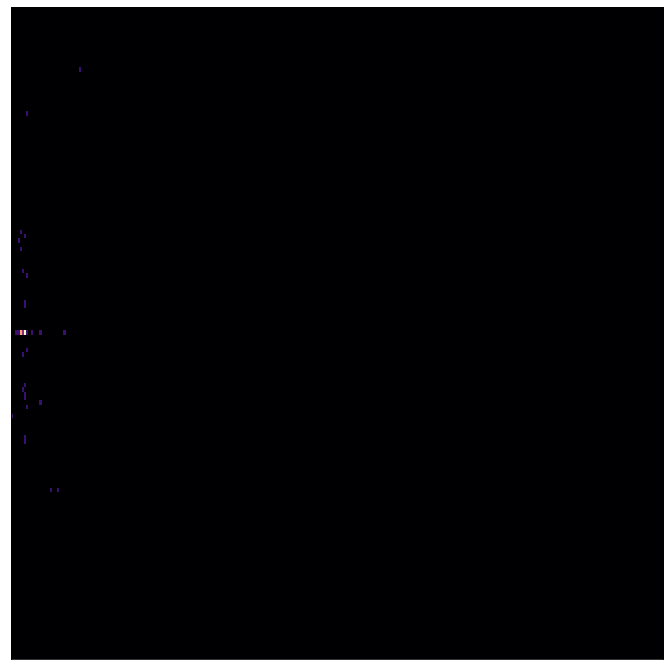

In [56]:
i = 0
create_image(signal_samples[i],image_name="/home/abhishek/Desktop/deltaeta_invmass_images_classification/images_norep_nocuts/signal/" + "deltaeta_invmass" + "_" + str(i) +'.png')

https://stackoverflow.com/questions/9786102/how-do-i-parallelize-a-simple-python-loop

In [21]:
from joblib import Parallel, delayed

def create_images_parallel(i):
    data = signal_samples[i]
    image_name = "/home/abhishek/Desktop/deltaeta_invmass_images_classification/images_norep_nocuts/signal/" + "deltaeta_invmass" + "_" + str(i) +'.png'
    create_image(data,image_name)

results = Parallel(n_jobs=35)(delayed(create_images_parallel)(i) for i in range(n))
print(results)

/tmp/ipykernel_384883/1376929335.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/tmp/ipykernel_384883/1376929335.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/tmp/ipykernel_384883/1376929335.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/tmp/ipykernel_384883/1376929335.py:16: RuntimeWarning: More than 20 figu

[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, Non

In [22]:
from joblib import Parallel, delayed

def create_images_parallel(i):
    data = background_samples[i]
    image_name = "/home/abhishek/Desktop/deltaeta_invmass_images_classification/images_norep_nocuts/background/" + "deltaeta_invmass" + "_" + str(i) +'.png'
    create_image(data,image_name)

results = Parallel(n_jobs=35)(delayed(create_images_parallel)(i) for i in range(n))
print(results)

[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, Non

In [ ]:
# leading_signal_images_dir = "/home/abhishek/Desktop/signal/leading_constituents_data_tower/"
# leading_signal_images_filenames = [leading_signal_images_dir + filename for filename in os.listdir(leading_signal_images_dir) ]

# subleading_signal_images_dir = "/home/abhishek/Desktop/signal/subleading_constituents_data_tower/"
# subleading_signal_images_filenames = [subleading_signal_images_dir + filename for filename in os.listdir(subleading_signal_images_dir) ]

# leading_background_images_dir = "/home/abhishek/Desktop/background/leading_constituents_data_tower/"
# leading_background_images_filenames = [leading_background_images_dir + filename for filename in os.listdir(leading_background_images_dir) ]

# subleading_background_images_dir = "/home/abhishek/Desktop/background/subleading_constituents_data_tower/"
# subleading_background_images_filenames = [subleading_background_images_dir + filename for filename in os.listdir(subleading_background_images_dir) ]